In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


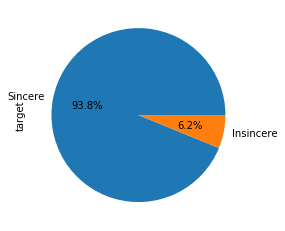

In [12]:
(df.target.value_counts()*100/len(df)).plot.pie(autopct='%.1f%%',labels=['Sincere','Insincere'])

In [13]:
## Text cleaning

In [19]:
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Mathi Azhakan C
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [20]:
questions=list()
lines=df.question_text.values.tolist()

In [248]:
#text=df.question_text.values
def clean(text):
    questions=list()
    lines=df.question_text.values.tolist()
    for i in lines:
        # TOkenizing the sentence
        tokens=word_tokenize(i)
        # Converting everything to lowercase to avoid descrepencies
        tokens=[i.lower() for i in tokens]
        # Removing Punctuations and Non alphabetics
        tabel=str.maketrans('','',string.punctuation)
        stripped=[i.translate(tabel) for i in tokens]
        words=[word for word in stripped if word.isalpha()]
        # removing stop words
        stop_words=set(stopwords.words('english'))
        words=[w for w in words if w not in stop_words]
        questions.append(words)
    return(questions)

In [26]:
question_text_tidy=[' '.join(i) for i in questions]

In [27]:
question_text_tidy

['quebec nationalists see province nation',
 'adopted dog would encourage people adopt shop',
 'velocity affect time velocity affect space geometry',
 'otto von guericke used magdeburg hemispheres',
 'convert montra helicon mountain bike changing tyres',
 'gaza slowly becoming auschwitz dachau treblinka palestinians',
 'quora automatically ban conservative opinions reported liberal views',
 'crazy wash wipe groceries germs everywhere',
 'thing dressing moderately different dressing modestly',
 'ever phase wherein became ignorant people loved completely disregarding feelingslives get something go way feel temporarily ease things change',
 'say feminism',
 'calgary flames founded',
 'dumbest yet possibly true explanation trump elected',
 'use external hard disk os well data storagewill data affected',
 'living home boyfriend would love boyfriend home progress situation',
 'know bram fischer rivonia trial',
 'difficult find good instructor take class near',
 'licked skin corpse',
 'think 

In [30]:
df.question_text[2]

'Why does velocity affect time? Does velocity affect space geometry?'

In [32]:
df['cleaned_que']=question_text_tidy

In [37]:
sincere=df[df['target']==0]

In [42]:
insincere=df[df['target']==1]

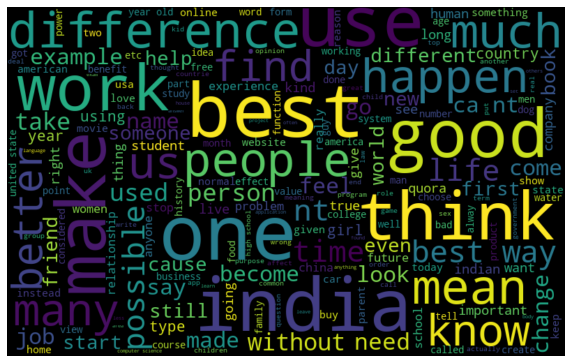

In [41]:
all_words = ' '.join([text for text in sincere['cleaned_que']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

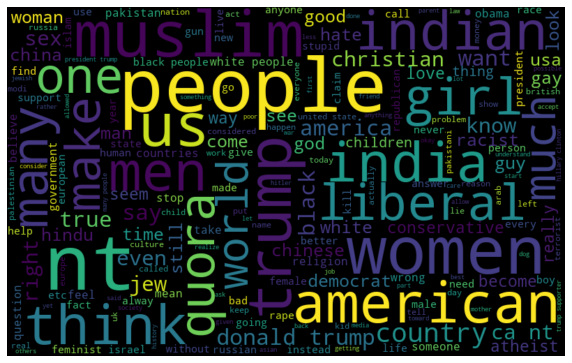

In [43]:
all_words = ' '.join([text for text in insincere['cleaned_que']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.9, min_df=2, stop_words='english',max_features=1000)

In [45]:
bow=bow_vectorizer.fit_transform(df.cleaned_que)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,stop_words='english',max_features=1000)

In [55]:
tfidf=tfidf_vectorizer.fit_transform(df.cleaned_que)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=tfidf
y=df.target

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33, random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lg=LogisticRegression()

In [75]:
clf=lg.fit(xtrain,ytrain)

C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
pred=lg.predict(xtest)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [68]:
lg.score(xtrain,ytrain)

0.9444406988450476

In [69]:
accuracy_score(ytest,pred)

0.9457868642131125

In [71]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    404744
           1       0.64      0.25      0.36     26277

    accuracy                           0.95    431021
   macro avg       0.80      0.62      0.67    431021
weighted avg       0.93      0.95      0.93    431021



In [73]:
from sklearn.metrics import plot_confusion_matrix

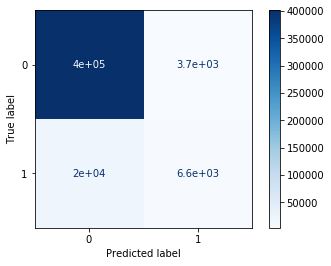

In [76]:
plot_confusion_matrix(clf,xtest,ytest,cmap='Blues',values_format='.3g')

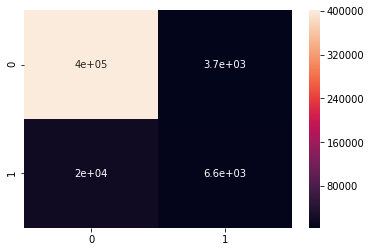

In [81]:
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,pred), annot=True)

In [82]:
confusion_matrix(ytest,pred)

array([[401004,   3740],
       [ 19627,   6650]], dtype=int64)

In [83]:
from sklearn.metrics import recall_score,precision_score

In [85]:
precision_score(ytest,pred)

0.6400384985563041

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [88]:
pred=lg.predict_proba(xtest)

In [90]:
pred[:,1]

array([0.00332989, 0.00588153, 0.00671397, ..., 0.00751023, 0.00483629,
       0.00203284])

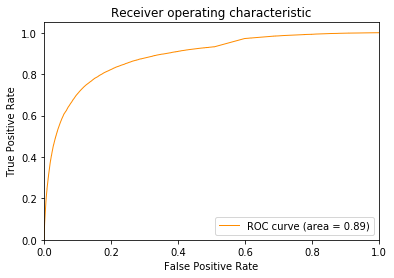

In [96]:
fpr, tpr, thresholds = roc_curve(ytest,pred[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [97]:
### Deep learning model


In [98]:
## Word embedding


In [99]:
import gensim

In [223]:
model=gensim.models.Word2Vec(sentences=questions,size=300,window=5,workers=4,min_count=1)
words=list(model.wv.vocab)

In [102]:
#Lets visualize the Word2Vec embeddings

In [103]:
X = model[model.wv.vocab]

C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [117]:
result.shape

(216298, 2)

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))


In [224]:
model.wv.most_similar('muslims')

[('hindus', 0.909224271774292),
 ('nonmuslims', 0.831607460975647),
 ('christians', 0.8171827793121338),
 ('muslim', 0.8129034042358398),
 ('islam', 0.8108981251716614),
 ('sikhs', 0.7912024259567261),
 ('brahmins', 0.7728027105331421),
 ('pakistanis', 0.7727219462394714),
 ('pandits', 0.7710174918174744),
 ('dalits', 0.7615523338317871)]

In [225]:
 model.wv.most_similar_cosmul(positive=['woman','trump'],negative=['man'])

[('trumps', 0.9092764258384705),
 ('tump', 0.889714241027832),
 ('obama', 0.8685063719749451),
 ('drumpf', 0.8554540872573853),
 ('solomonic', 0.850135862827301),
 ('tiffanytrump', 0.8455617427825928),
 ('heiney', 0.8423290848731995),
 ('realdonadtrump', 0.8313592672348022),
 ('trumpster', 0.8220041394233704),
 ('democrats', 0.8214826583862305)]

In [125]:
# #Save the model
# filename='Quora questions_embedding.txt'
# model.wv.save_word2vec_format(filename,binary=False)

In [226]:
#Save the model
filename='Quora questions_embedding_300_dim.txt'
model.wv.save_word2vec_format(filename,binary=False)

In [126]:
# Next step is to load the word embeddings as a dictionary of  words and vectors

In [227]:
import os
embedding_index={}
f=open(os.path.join('','Quora questions_embedding_300_dim.txt'), encoding='utf-8')
for line in f:
    value=line.split()
    word=value[0]
    coefs=np.asarray(value[1:])
    embedding_index[word]=coefs
f.close

<function TextIOWrapper.close()>

### Embedding_Index is a dictionary containing word as values and the correspondioing vectors(100 dimenssions as values)

### Now we have vectors for each word, the next step is converting the word embeddings into tokenized vectors, actually each integer maps to the index of the specific word vector,So now we will create a map such that each integer in the embedding index maps to the words, such that the encodecd words mapped to the correct vector

In [135]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [239]:
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(questions)
sequence=tokenizer_obj.texts_to_sequences(questions)
# Sequence is an index representation of words from tokenizer_obj.word_index

In [240]:
tokenizer_obj.word_index ## It is a dictionary having a integer value for each word
#Example the Integer value i.e index of 'reaction' is 983
print(tokenizer_obj.word_index['reaction'])

983


In [200]:
word_index_df=pd.DataFrame({'Word': list(word_index.keys()),
                  'index': list(word_index.values())})

In [201]:
word_index_df.index=word_index_df.Word
word_index_df.drop('Word', axis=1, inplace=True)

In [205]:
word_index_df.head() #This is how the word index looks

,index
Word,
get,1
would,2
best,3
people,4
like,5


In [161]:
print(f'The {questions[0]} is mapped as {sequence[0]}')

The ['quebec', 'nationalists', 'see', 'province', 'nation'] is mapped as [6308, 7025, 69, 5808, 1000]


In [164]:
for i in questions[0]:
    print(tokenizer_obj.word_index[i])

6308
7025
69
5808
1000


In [169]:
word_index=tokenizer_obj.word_index
print(len(word_index))
max_length=max([len(i.split()) for i in df.question_text]) #length of the logest sentence
print(max_length)

216298
134


## We add padding to make all the vectors of same length

In [191]:
question_pad=pad_sequences(sequence,maxlen=max_length)


array([[    0,     0,     0, ...,    69,  5808,  1000],
       [    0,     0,     0, ...,     4,  2880,  1671],
       [    0,     0,     0, ...,   254,   338,  5252],
       ...,
       [    0,     0,     0, ...,  7503, 11096,  2794],
       [    0,     0,     0, ...,  5646,  3249,   324],
       [    0,     0,     0, ...,  1299,  7616, 20978]])

In [192]:
len(question_pad[0])

134

In [173]:
sincerity=df.target.values
print('The shape of question tensor',question_pad.shape)
print('The shape of the target tensor',sincerity.shape)

The shape of question tensor (1306122, 134)
The shape of the target tensor (1306122,)


#### Now we will map embeddings from the loaded word2vec model for each word to the tokenizer_obj.word_index vocabulary and create a matrix with of word vectors.

In [228]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300)) #300 is embedding dimension

In [229]:
for word,i in word_index.items():
    if i>num_words:
        continue
        embedding_vector=embedding_index.get(word)
        
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [230]:
embedding_matrix.shape

(216299, 300)

In [260]:
## Creating embedding matrix
def Create_embbeding_matrix(cleaned_text):
    from tensorflow.python.keras.preprocessing.text import Tokenizer
    from tensorflow.python.keras.preprocessing.sequence import pad_sequences
    ## Step 1 Tokenization
    tokenizer_obj=Tokenizer()
    tokenizer_obj.fit_on_texts(questions)
    sequence=tokenizer_obj.texts_to_sequences(questions)
    # Sequence is an index representation of words from tokenizer_obj.word_index
    
    
    ## Step 2 Creating Word_index and Pad_length
    word_index=tokenizer_obj.word_index
    max_length=max([len(i.split()) for i in df.question_text]) #length of the logest sentence
    
    
    ## Step 3 Create padding to make the length all of vectors equal
    question_pad=pad_sequences(sequence,maxlen=max_length)
    
    
    ## step 4 Create Embedding matrix of size (len(word_index)-->number of unique words X number of dimension)
    num_words=len(word_index)+1
    embedding_matrix=np.zeros((num_words,100)) #100 is embedding dimension
    
    
    ## Step 5 Fill the embedding Matrix with word2vec embeddings from embedding_index
    for word,i in word_index.items():
        if i>num_words:
            continue
            embedding_vector=embedding_index.get(word)

            if embedding_vector is not None:
                embedding_matrix[i]=embedding_vector
    return num_words,max_length,question_pad,embedding_matrix

In [261]:
def Create_pad_vector(cleaned_text):
    from tensorflow.python.keras.preprocessing.text import Tokenizer
    from tensorflow.python.keras.preprocessing.sequence import pad_sequences
    ## Step 1 Tokenization
    tokenizer_obj=Tokenizer()
    tokenizer_obj.fit_on_texts(questions)
    sequence=tokenizer_obj.texts_to_sequences(questions)
    # Sequence is an index representation of words from tokenizer_obj.word_index
    
    
    ## Step 2 Creating Word_index and Pad_length
    word_index=tokenizer_obj.word_index
    max_length=max([len(i.split()) for i in df.question_text]) #length of the logest sentence
    
    
    ## Step 3 Create padding to make the length all of vectors equal
    question_pad=pad_sequences(sequence,maxlen=max_length)
    return question_pad

# We are now ready with the trained embedding vector to be used directly in the embedding layer. In the below code, the only change from previous model is using the embedding_matrix as input to the Embedding layer and setting trainable = False, since the embedding is already learned.

In [231]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM,GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

In [233]:
model=Sequential()
embedding_layer=Embedding(num_words,300,embeddings_initializer=Constant(embedding_matrix),input_length=max_length,trainable=False)
model.add(embedding_layer)
model.add(GRU(units=32,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [234]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 134, 300)          64889700  
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                31968     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 64,921,701
Trainable params: 32,001
Non-trainable params: 64,889,700
_________________________________________________________________


### Train test split

In [237]:
validation_split=0.2
indices=np.arange(question_pad.shape[0])
np.random.shuffle(indices)
question_pad=question_pad[indices]
sincerity=sincerity[indices]
num_val_sample=int(validation_split*question_pad.shape[0])
X_train_pad=question_pad[:-num_val_sample]
y_train=sincerity[:-num_val_sample]
X_test_pad=question_pad[-num_val_sample:]
y_test=sincerity[-num_val_sample:]

In [221]:
def train_test_split(padded_array,test_size,y):
    validation_split=test_size
    indices=np.arange(padded_array.shape[0])
    np.random.shuffle(indices)
    padded_array=padded_array[indices]
    y=y[indices]
    num_val_sample=int(validation_split*padded_array.shape[0])
    X_train_pad=padded_array[:-num_val_sample]
    y_train=y[:-num_val_sample]
    X_test_pad=padded_array[-num_val_sample:]
    y_test=y[-num_val_sample:]
    print('shape of train',X_train_pad.shape)
    print('shape of train',y_train.shape)
    print('shape of test',X_test_pad.shape)
    print('shape of test',y_test.shape)
    return X_train,X_test,y_train,y_test

In [238]:
print('shape of train',X_train_pad.shape)
print('shape of train',y_train.shape)
print('shape of test',X_test_pad.shape)
print('shape of test',y_test.shape)

shape of train (1044898, 134)
shape of train (1044898,)
shape of test (261224, 134)
shape of test (261224,)


In [241]:
print('Train...')
model.fit(X_train_pad,y_train,batch_size=128,epochs=10,validation_data=(X_test_pad,y_test), verbose=2)

Train...
Train on 1044898 samples, validate on 261224 samples
Epoch 1/10
 - 1214s - loss: 1.1604 - accuracy: 0.9381 - val_loss: 0.2375 - val_accuracy: 0.9382
Epoch 2/10
 - 1220s - loss: 0.2326 - accuracy: 0.9381 - val_loss: 0.2325 - val_accuracy: 0.9382
Epoch 3/10
 - 1215s - loss: 0.2323 - accuracy: 0.9381 - val_loss: 0.2321 - val_accuracy: 0.9382
Epoch 4/10
 - 1234s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2319 - val_accuracy: 0.9382
Epoch 5/10
 - 1220s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2321 - val_accuracy: 0.9382
Epoch 6/10
 - 1217s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2319 - val_accuracy: 0.9382
Epoch 7/10
 - 1223s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2320 - val_accuracy: 0.9382
Epoch 8/10
 - 1219s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2320 - val_accuracy: 0.9382
Epoch 9/10
 - 1253s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2319 - val_accuracy: 0.9382
Epoch 10/10
 - 1341s - loss: 0.2322 - accuracy: 0.9381 - val_loss: 0.2319 

In [245]:
test=pd.read_csv('test.csv')

In [262]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(clean)
transformer2= FunctionTransformer(Create_pad_vector)

In [263]:
steps = [('trans1', transformer), ('trans2', transformer2),('Model',model)]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

In [258]:
test

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub=pipeline.predict(test.question_text)